In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
# Standardize the data
X_scaled = StandardScaler().fit_transform(X)
optics = OPTICS(min_samples=5, cluster_method='xi', xi=0.05, min_cluster_size=0.1)
y_optics = optics.fit_predict(X_scaled)

In [7]:
supervised_optics = dataset.copy()
supervised_optics['Cluster_group'] = y_optics
# Save the results to a new CSV file
supervised_optics.to_csv("cluster_optics.csv", index=False)

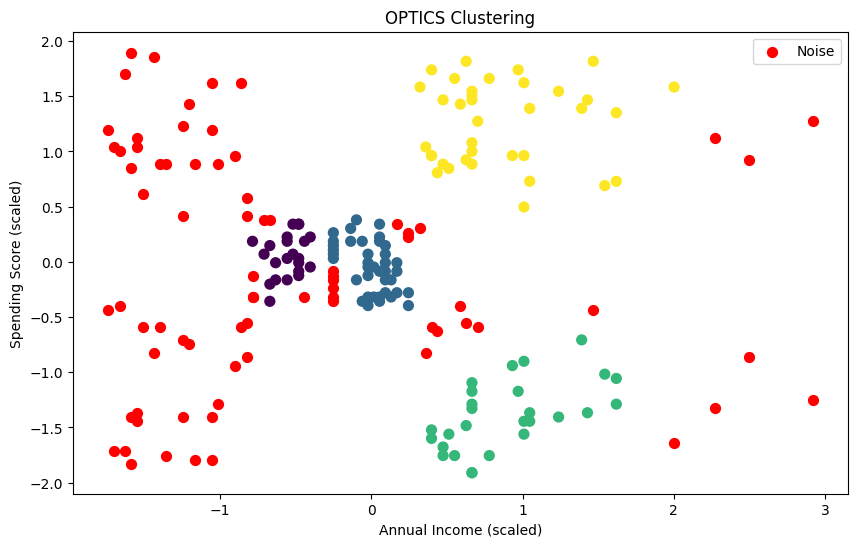

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_optics == -1, 0], X_scaled[y_optics == -1, 1], s=50, c='red', label='Noise')
plt.scatter(X_scaled[y_optics != -1, 0], X_scaled[y_optics != -1, 1], s=50, c=y_optics[y_optics != -1], cmap='viridis')
plt.title('OPTICS Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

C:\Users\Malya\anaconda3\envs\aimlds\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


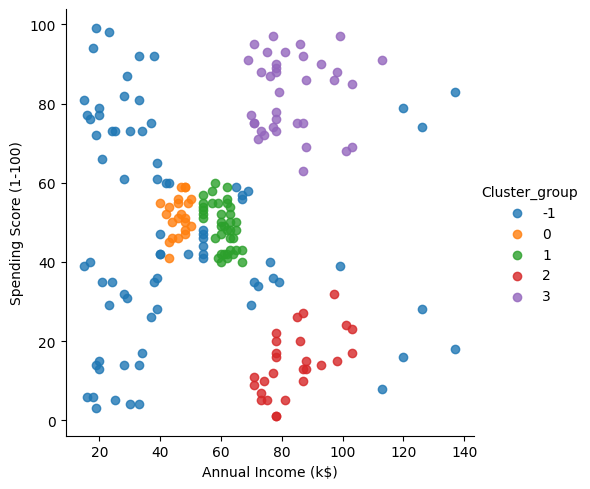

In [9]:
# Using seaborn to plot with cluster labels
facet_optics = sns.lmplot(data=supervised_optics, x=supervised_optics.columns[3], y=supervised_optics.columns[4], hue='Cluster_group',
                           fit_reg=False, legend=True, legend_out=True)